### SMOTE Technique - class imbalance
### Feature extraction using PCA

In [1]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
len(df)

4250

In [4]:
len(df.columns)

20

In [5]:
len(df)

4250

In [6]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data preprocessing

In [7]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Data types of columns

In [8]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

##  encoding data

 Here international plan and voice mail plan are two columns with yes or no values. The best method to encode categorical variables with values Yes/No is replacing them with 1/0
Yes - 1
No - 0

In [9]:
features=["international_plan","voice_mail_plan","churn"]

In [10]:
def encodeYesNo(feature):
    df.loc[df[feature] == 'yes', feature] = 1
    df.loc[df[feature] == 'no', feature ] = 0

In [11]:
for feature in features:
    encodeYesNo(feature)

In [12]:
df[features].head()

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [13]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


###  Encoding Other features 

In [14]:
df["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [15]:
len(df["state"].unique())

51

In [16]:
df["area_code"].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [17]:
ordinal_features = ["state","area_code"]
ce_ord = ce.TargetEncoder(cols = ordinal_features)
df = ce_ord.fit_transform(df,df["churn"])

In [18]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,107,0.136148,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.270833,137,0.136148,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0.126316,84,0.139963,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,0.205128,75,0.136148,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.157303,121,0.150568,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
5,0.125000,147,0.136148,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
6,0.101449,117,0.139963,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
7,0.136691,141,0.136148,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
8,0.156627,65,0.136148,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
9,0.068966,74,0.136148,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


In [19]:
df["state"].unique()

array([0.12631579, 0.27083333, 0.20512821, 0.15730337, 0.125     ,
       0.10144928, 0.13669065, 0.15662651, 0.06896552, 0.11290323,
       0.2125    , 0.16666667, 0.11320755, 0.05      , 0.19387755,
       0.11842105, 0.1125    , 0.09090909, 0.19444444, 0.10526316,
       0.05194805, 0.12820513, 0.06557377, 0.109375  , 0.22093023,
       0.15492958, 0.07446809, 0.15151515, 0.17241379, 0.1625    ,
       0.12371134, 0.25641026, 0.14666667, 0.0875    , 0.225     ,
       0.17592593, 0.20481928, 0.11111111, 0.11627907, 0.14117647,
       0.17977528, 0.18292683, 0.12871287, 0.06849315, 0.15189873,
       0.07594937, 0.11940299, 0.17045455, 0.08955224])

In [20]:
df["area_code"].unique()

array([0.13614801, 0.13996317, 0.15056818])

## Scaling the dataset

In [21]:
scaled_df=df

In [22]:
scaled_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,107,0.136148,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.270833,137,0.136148,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0.126316,84,0.139963,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,0.205128,75,0.136148,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.157303,121,0.150568,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [23]:
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(df[['account_length','number_vmail_messages', 'total_day_minutes',"total_day_calls","total_day_charge","total_eve_minutes","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls"]]) 


In [24]:
scaled_df['account_length'] = scaled[:,0]
scaled_df['number_vmail_messages'] = scaled[:,1]
scaled_df['total_day_minutes'] = scaled[:,2] 
scaled_df['total_day_calls'] = scaled[:,3]
scaled_df['total_day_charge'] = scaled[:,4]
scaled_df['total_eve_minutes'] = scaled[:,5]
scaled_df['total_eve_charge'] = scaled[:,6]
scaled_df['total_night_minutes'] = scaled[:,7]
scaled_df['total_night_calls'] = scaled[:,8] 
scaled_df['total_night_charge'] = scaled[:,9]
scaled_df['total_intl_minutes'] = scaled[:,10]
scaled_df['total_intl_calls'] = scaled[:,11]
scaled_df['total_intl_charge'] = scaled[:,12]
scaled_df['number_customer_service_calls'] = scaled[:,13]

In [25]:
scaled_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,0.170399,0.136148,0,1,1.366857,-0.345510,1.163449,-0.345788,-0.093025,103,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,-0.426346,0
1,0.270833,0.926186,0.136148,0,0,-0.567911,1.169136,0.710014,1.169295,-1.571820,110,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,-1.188960,0
2,0.126316,-0.409038,0.139963,1,0,-0.567911,2.206058,-1.456398,2.206218,-2.752070,88,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.336268,0
3,0.205128,-0.635774,0.136148,1,0,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,122,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,1.098882,0
4,0.157303,0.523099,0.150568,0,1,1.218029,0.702522,-0.599910,0.702027,2.952139,108,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,1.098882,0


# Splitting training dataset into test and train

In [26]:
x = df.drop("churn",axis=1)


In [27]:
x.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.126316,0.170399,0.136148,0,1,1.366857,-0.345510,1.163449,-0.345788,-0.093025,103,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,-0.426346
1,0.270833,0.926186,0.136148,0,0,-0.567911,1.169136,0.710014,1.169295,-1.571820,110,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,-1.188960
2,0.126316,-0.409038,0.139963,1,0,-0.567911,2.206058,-1.456398,2.206218,-2.752070,88,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.336268
3,0.205128,-0.635774,0.136148,1,0,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,122,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,1.098882
4,0.157303,0.523099,0.150568,0,1,1.218029,0.702522,-0.599910,0.702027,2.952139,108,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,1.098882


In [28]:
y = df[["churn"]]
y.head()

,churn
0,0
1,0
2,0
3,0
4,0


## Handling class imbalance problem

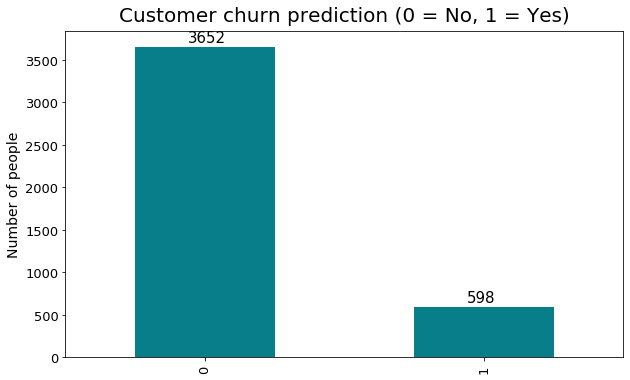

In [29]:
ax = scaled_df['churn'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Customer churn prediction (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of people', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

we can see that most of the target atrribute values are No. So the model might get biased. So we need to handle it using class imbalance techniques

In [30]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X, Y = sm.fit_resample(df.drop("churn",axis=1), df["churn"])

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X.shape}''')

print('\nBalance of positive and negative classes (%):')
Y.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4250, 19)
Shape of X after SMOTE: (7304, 19)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: churn, dtype: float64

In [31]:
len(X)

7304

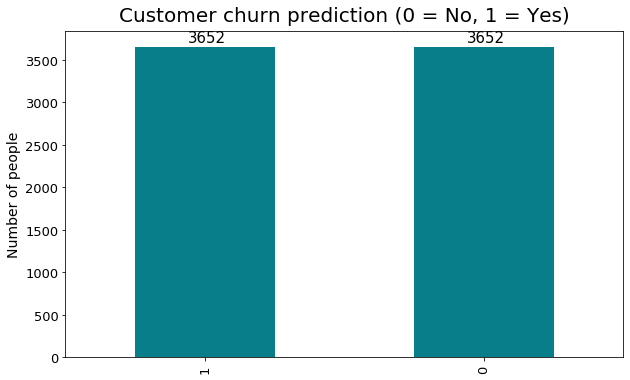

In [32]:
ax = Y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Customer churn prediction (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of people', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

## Dimensionality reduction

In [33]:
pca = PCA(n_components=13)
x_pca=pd.DataFrame(pca.fit_transform(X))

x_pca.shape

(7304, 13)

In [34]:
pca.explained_variance_ratio_

array([9.66261103e-01, 6.85827007e-03, 4.41718239e-03, 4.32633890e-03,
       4.11560856e-03, 2.96882325e-03, 2.28030252e-03, 2.23317145e-03,
       2.13195212e-03, 2.09616608e-03, 2.03806472e-03, 2.16305065e-04,
       5.13823585e-05])

In [35]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.128943,0.560658,-1.465144,1.151783,1.438319,-0.666837,-0.749588,1.156544,0.088763,-1.087870,-1.110724,-0.148922,-0.197522
1,-10.121567,-0.643926,-0.860232,1.679753,-2.462815,-1.106365,-1.048984,0.069231,0.608394,0.048008,0.531188,-0.138475,0.015249
2,11.869959,-1.175392,2.519958,3.192444,-3.109261,-0.112697,1.355061,-0.299955,-0.743283,1.097480,0.433330,0.965583,-0.032290
3,-22.128760,1.370900,0.250238,0.879438,-0.828161,0.652346,-0.034988,-0.451177,1.496493,0.145007,-0.577406,0.900157,-0.030575
4,-8.139539,-1.499502,0.926488,-3.254854,1.823944,0.629920,1.605728,2.115344,0.003679,-0.460436,0.549989,-0.049769,-0.279705


## Splitting the dataset into test and train

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_pca,Y,test_size=0.4,random_state=0)

## Applying models 

- Decision tree
- Naive bayes
- Logistic regression
- KNN
- SVM

### Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dcls = DecisionTreeClassifier(max_depth= 3)

In [38]:
dcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
y_pred = dcls.predict(x_test)

In [40]:
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [41]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1331  124]
 [ 418 1049]]
Precision: 0.894
Recall: 0.715
F1 Score: 0.795


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
accuracy_score(y_test,y_pred)* 100

81.45106091718002

In [44]:
y_test.shape

(2922,)

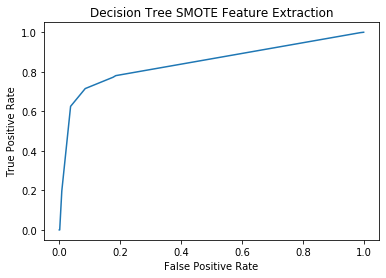

In [45]:
import sklearn.metrics as metrics
y_pred_proba1 = dcls.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)

#create ROC curve
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Decision Tree SMOTE Feature Extraction")
plt.show()

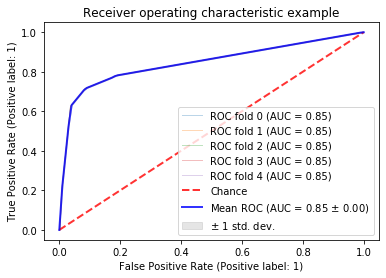

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, Y)):
    dcls.fit(x_train,y_train)
    viz = RocCurveDisplay.from_estimator(
        dcls,
        x_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [46]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(dcls,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.75770021 0.78986995 0.80219028 0.80287474 0.80616438]
Accuracy of model with cross validation score is :79.17599129888518


In [53]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(dcls,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)

print("Precision of model with cross validation score is :{}".format(score["test_precision"].mean()))
print("Precision of model with cross validation score is :{}".format(score["test_recall"].mean()))
print("Precision of model with cross validation score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.0259316 , 0.02596903, 0.02293921, 0.0229404 , 0.02293086]), 'score_time': array([0.00698042, 0.00499177, 0.00498462, 0.00494218, 0.004987  ]), 'test_precision': array([0.80618893, 0.85215947, 0.83792049, 0.844479  , 0.84651163]), 'test_recall': array([0.67808219, 0.70273973, 0.749658  , 0.74281806, 0.74794521]), 'test_f1_score': array([0.73660714, 0.77027027, 0.79133574, 0.79039301, 0.79418182])}
Precision of model with cross validation score is :0.8374519030778428
Precision of model with cross validation score is :0.724248636695838
Precision of model with cross validation score is :0.776557596896374


### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [55]:
y_pred  =  classifier.predict(x_test)

In [56]:
 y_pred  

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [57]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1151  304]
 [ 291 1176]]
Precision: 0.795
Recall: 0.802
F1 Score: 0.798


In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [59]:
print("Accuracy score: ",ac*100)

Accuracy score:  79.637234770705


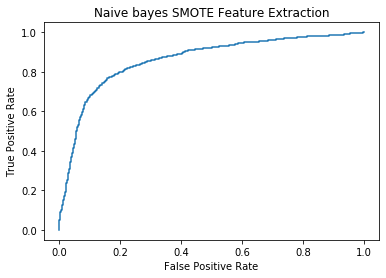

In [60]:
import sklearn.metrics as metrics
y_pred_proba2 = classifier.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)

#create ROC curve
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Naive bayes SMOTE Feature Extraction")
plt.show()

In [61]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(classifier,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.71663244 0.77960301 0.76317591 0.75290897 0.77328767]
Accuracy of model with cross validation score is :75.71215999549942


In [65]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(classifier,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.00598693, 0.00399017, 0.00698185, 0.00797772, 0.00396085]), 'score_time': array([0.0059824 , 0.00598192, 0.00503016, 0.00501227, 0.00600338]), 'test_precision': array([0.68899522, 0.74343675, 0.72462077, 0.71971496, 0.72696246]), 'test_recall': array([0.7890411 , 0.85342466, 0.8495212 , 0.82900137, 0.87534247]), 'test_f1_score': array([0.73563218, 0.79464286, 0.78211587, 0.77050223, 0.79428216])}
Precision of model with precision score is :0.7207460322648801
Precision of model with recall score is :0.8392661581995015
Precision of model with f1 score is :0.7754350595900548


### Logistic Regression

In [66]:
### Applying the logistic regression:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [68]:
### checking the accuracy of the model:

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [69]:
print("Accuracy score: ",accuracy_score(y_test,y_pred)*100)

Accuracy score:  77.0362765229295


In [70]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1086  369]
 [ 302 1165]]
Precision: 0.759
Recall: 0.794
F1 Score: 0.776


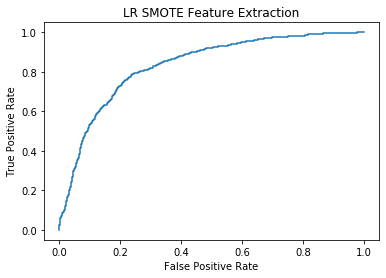

In [71]:
import sklearn.metrics as metrics
y_pred_proba3 = lr.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba3)

#create ROC curve
plt.plot(fpr3,tpr3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("LR SMOTE Feature Extraction")
plt.show()

In [72]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(lr,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Cross Validation Scores are [0.75017112 0.79329227 0.7816564  0.78850103 0.78150685]
Accuracy of model with cross validation score is :77.902553139621


C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [74]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(lr,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

{'fit_time': array([0.08377433, 0.07180595, 0.051862  , 0.06482744, 0.06083465]), 'score_time': array([0.00498843, 0.00598335, 0.00698161, 0.00598598, 0.00498629]), 'test_precision': array([0.75103164, 0.78763441, 0.76753247, 0.78284182, 0.76516129]), 'test_recall': array([0.74794521, 0.80273973, 0.80848153, 0.79890561, 0.81232877]), 'test_f1_score': array([0.74948524, 0.79511533, 0.78747502, 0.79079215, 0.78803987])}
Precision of model with precision score is :0.7708403252754646
Precision of model with recall score is :0.794080167906602
Precision of model with f1 score is :0.7821815212175369


C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

### K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred = knn.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

86.07118412046543

In [52]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1084  371]
 [  36 1431]]
Precision: 0.794
Recall: 0.975
F1 Score: 0.875


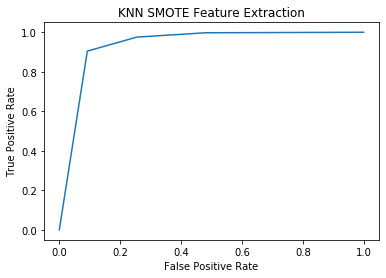

In [53]:
import sklearn.metrics as metrics
y_pred_proba4 = knn.predict_proba(x_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba4)

#create ROC curve
plt.plot(fpr4,tpr4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("KNN SMOTE Feature Extraction")
plt.show()

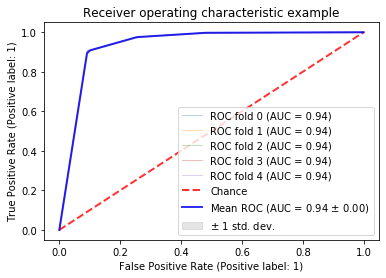

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, Y)):
    knn.fit(x_train,y_train)
    viz = RocCurveDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [80]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(lr,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Cross Validation Scores are [0.75017112 0.79329227 0.7816564  0.78850103 0.78150685]
Accuracy of model with cross validation score is :77.902553139621


C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [82]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(knn,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.00398946, 0.00399041, 0.00299168, 0.00299454, 0.00498629]), 'score_time': array([0.19946599, 0.18753958, 0.22240305, 0.1824677 , 0.2064476 ]), 'test_precision': array([0.8064877 , 0.81838565, 0.81208054, 0.79868709, 0.80353201]), 'test_recall': array([0.98767123, 1.        , 0.99316005, 0.99863201, 0.99726027]), 'test_f1_score': array([0.88793103, 0.9001233 , 0.89353846, 0.88753799, 0.88997555])}
Precision of model with precision score is :0.8078345962863931
Precision of model with recall score is :0.995344714502558
Precision of model with f1 score is :0.8918212689253423


### Support Vector Machine

In [83]:
# support vector machine
from sklearn.svm import SVC #importing the support vector machine model 
svm=SVC() #initializing the support vector machine  model
svm.fit(x_train,y_train) # training the model
predictions=svm.predict(x_test) # predicting the glass types for test data

In [84]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,predictions)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

[[1065  390]
 [ 321 1146]]
Precision: 0.746
Recall: 0.781
F1 Score: 0.763


In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)*100

75.66735112936345

In [86]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(svm,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.66735113 0.72621492 0.69883641 0.70157426 0.70958904]
Accuracy of model with cross validation score is :70.07131538728399


In [88]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(svm,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([1.80720782, 1.80122614, 1.78821731, 1.78626704, 1.81015539]), 'score_time': array([0.8436985 , 0.84574389, 0.83670974, 0.84075093, 0.84274578]), 'test_precision': array([0.66850829, 0.72727273, 0.69958848, 0.70177839, 0.6966581 ]), 'test_recall': array([0.6630137 , 0.72328767, 0.69767442, 0.70177839, 0.74246575]), 'test_f1_score': array([0.66574966, 0.72527473, 0.69863014, 0.70177839, 0.71883289])}
Precision of model with precision score is :0.6987611950782179
Precision of model with recall score is :0.7056439855330473
Precision of model with f1 score is :0.702053159080334


## ADA Boost classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ada.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1455
           1       0.84      0.81      0.83      1467

    accuracy                           0.83      2922
   macro avg       0.83      0.83      0.83      2922
weighted avg       0.83      0.83      0.83      2922



In [57]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1223  232]
 [ 272 1195]]
Precision: 0.837
Recall: 0.815
F1 Score: 0.826


In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

82.75154004106776

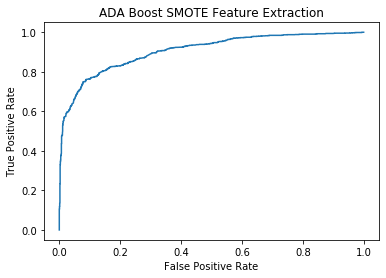

In [59]:
import sklearn.metrics as metrics
y_pred_proba5 = ada.predict_proba(x_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba5)

#create ROC curve
plt.plot(fpr5,tpr5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ADA Boost SMOTE Feature Extraction")
plt.show()

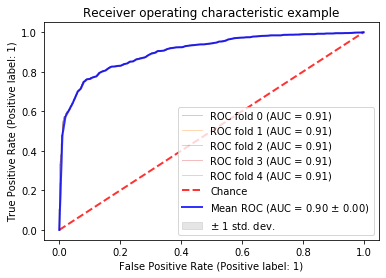

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, Y)):
    ada.fit(x_train,y_train)
    viz = RocCurveDisplay.from_estimator(
        ada,
        x_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [60]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(ada,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.72689938 0.9137577  0.91444216 0.92334018 0.9260274 ]
Accuracy of model with cross validation score is :88.08933644623217


In [95]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(ada,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.47677135, 0.46874166, 0.47676778, 0.45278478, 0.44884562]), 'score_time': array([0.01894855, 0.02189922, 0.01895118, 0.01990604, 0.01794982]), 'test_precision': array([0.90663391, 0.91839557, 0.91735537, 0.91655451, 0.92255435]), 'test_recall': array([0.50547945, 0.90958904, 0.91108071, 0.93160055, 0.93013699]), 'test_f1_score': array([0.64907652, 0.91397109, 0.91420728, 0.92401628, 0.92633015])}
Precision of model with precision score is :0.9162987418212744
Precision of model with recall score is :0.8375773476003973
Precision of model with f1 score is :0.8655202637909175


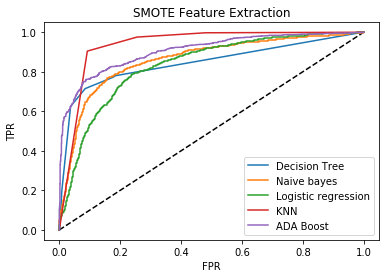

In [140]:
from sklearn.metrics import roc_curve

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Naive bayes")
plt.plot(fpr3, tpr3, label= "Logistic regression")
plt.plot(fpr4, tpr4, label= "KNN")
plt.plot(fpr5, tpr5, label= "ADA Boost")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('SMOTE Feature Extraction')
plt.show()